In [4]:
#import data & select data for training and test
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/main/ProjectAssignmentData/Dataset-PT.csv'

df = pd.read_csv(url)

df.columns = df.iloc[0]
df = df[1:]

df = df.dropna(how='all')

# df = df.iloc[:81000]

df.iloc[:, 0:14] = df.iloc[:, 0:14].astype(float)
df.iloc[:, 14:18] = df.iloc[:, 14:18].astype(str)
df.iloc[:, 18:31] = df.iloc[:, 18:31].astype(int)

df

<ipython-input-4-7ed22dec0aef>:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
1,20220108.0,4.0,41344.0,1.0,151.0,0.0,0.0,120.0,100.0,100.0,...,0,0,0,0,1,0,1,0,0,1
2,20220108.0,4.0,41344.0,2.0,185.0,24.0,171.0,45.0,151.0,100.0,...,0,0,0,0,1,0,1,0,0,1
3,20220108.0,4.0,41344.0,3.0,186.0,0.0,55.0,41.0,185.0,100.0,...,0,0,0,0,1,0,1,0,0,1
4,20220108.0,4.0,41344.0,4.0,202.0,12.0,42.0,94.0,186.0,100.0,...,0,0,0,0,1,0,1,0,0,1
5,20220108.0,4.0,41344.0,5.0,242.0,21.0,98.0,86.0,202.0,100.0,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545099,20220630.0,4.0,41362.0,23.0,344.0,13.0,74.0,44.0,341.0,12.0,...,0,0,0,0,1,1,0,0,0,1
545100,20220630.0,4.0,41362.0,24.0,330.0,15.0,34.0,92.0,344.0,12.0,...,0,0,0,0,1,1,0,0,0,1
545101,20220630.0,4.0,41362.0,25.0,339.0,17.0,63.0,43.0,330.0,12.0,...,0,0,0,0,1,1,0,0,0,1
545102,20220630.0,4.0,41362.0,26.0,331.0,0.0,35.0,58.0,339.0,12.0,...,0,0,0,0,1,1,0,0,0,1


In [5]:
#change the type of data

object_columns = df.select_dtypes(include='object').columns
print(object_columns)
for col in object_columns:
  if col!='weather'  and col!='temperature' and col!='day_of_week' and col!='time_of_day':
    df[col] = df[col].astype('Float64')
object_columns = df.select_dtypes(include='float64').columns

Index(['Calendar_date', 'route_id', 'bus_id', 'stop_sequence', 'arrival_delay',
       'dwell_time', 'travel_time_for_previous_section',
       'scheduled_travel_time', 'upstream_stop_delay', 'origin_delay',
       'previous_bus_delay', 'previous_trip_travel_time', 'traffic_condition',
       'recurrent_delay', 'weather', 'temperature', 'day_of_week',
       'time_of_day', 'factor(weather)Light_Rain', 'factor(weather)Light_Snow',
       'factor(weather)Normal', 'factor(weather)Rain', 'factor(weather)Snow',
       'factor(temperature)Cold', 'factor(temperature)Extra_cold',
       'factor(temperature)Normal', 'factor(day_of_week)weekday',
       'factor(day_of_week)weekend', 'factor(time_of_day)Afternoon_peak',
       'factor(time_of_day)Morning_peak', 'factor(time_of_day)Off-peak'],
      dtype='object', name=0)


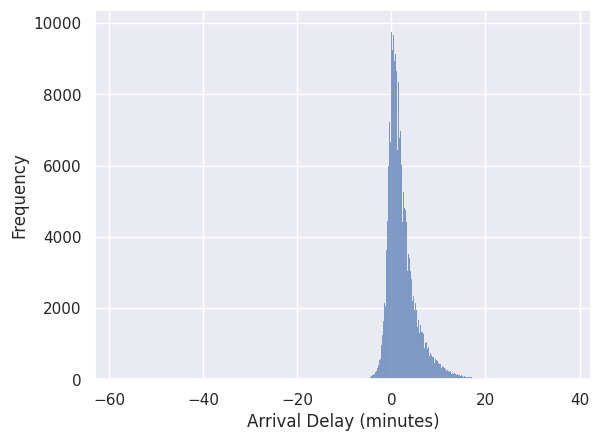

In [7]:
#plot frequency map of bus delay

%matplotlib inline
sns.set()

df['arrival_delay_minutes'] = df['arrival_delay']/60
sns.histplot(x=df['arrival_delay_minutes'])

plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

In [8]:
#Calculate the correlation between arrival delay and other factors that might be  related to arrival delay

df = df.drop(['arrival_delay_minutes', 'Calendar_date', 'bus_id', 'route_id', 'day_of_week', 'time_of_day', 'temperature', 'weather'], axis=1)

corr_matrix = df.corr()
corr_matrix['arrival_delay'].sort_values(ascending=False)

,arrival_delay
0,
arrival_delay,1.000000
upstream_stop_delay,0.975019
origin_delay,0.716324
previous_bus_delay,0.265434
factor(day_of_week)weekend,0.190783
factor(time_of_day)Off-peak,0.138109
stop_sequence,0.092616
dwell_time,0.089433
travel_time_for_previous_section,0.081113


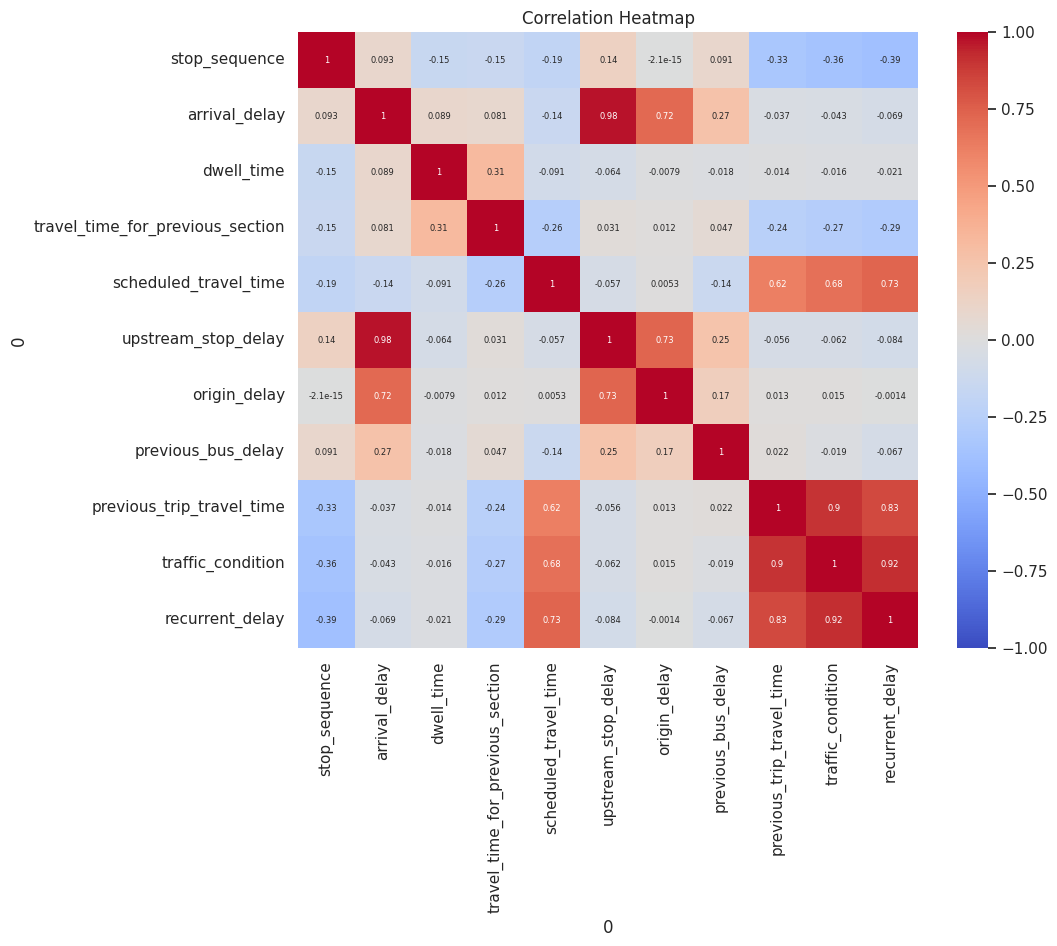

In [13]:
#Correlation plotting

# rain = df.drop(['factor(weather)Normal', 'factor(temperature)Normal', 'factor(weather)Snow', 'factor(weather)Light_Snow', 'factor(temperature)Cold', 'factor(temperature)Extra_cold',], axis =1)
# snow = df.drop(['factor(weather)Normal', 'factor(temperature)Normal', 'factor(weather)Rain', 'factor(weather)Light_Rain', 'factor(temperature)Cold', 'factor(temperature)Extra_cold',], axis =1)
normal = df.drop(['factor(weather)Normal', 'factor(weather)Rain', 'factor(weather)Light_Rain', 'factor(weather)Snow', 'factor(weather)Light_Snow', 'factor(temperature)Cold', 'factor(temperature)Extra_cold','factor(temperature)Normal','factor(day_of_week)weekday',	'factor(day_of_week)weekend',	'factor(time_of_day)Afternoon_peak','factor(time_of_day)Morning_peak','factor(time_of_day)Off-peak'], axis =1)


corr_rain = rain.corr()
corr_snow = snow.corr()
corr_normal = normal.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_normal, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 6})
plt.title('Correlation Heatmap')
plt.show()

In [15]:
#Split Dataset & Scalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df.drop(['arrival_delay'], axis=1)
y = df['arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
#Training with different model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt



# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)





# KNN
# model = KNeighborsRegressor(n_neighbors=5, weights='distance')
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

# param_grid = {
#     'n_neighbors': [4, 5, 7],
#     'weights': ['uniform', 'distance']
# }

# grid_search = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train_scaled, y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Negative MSE:", best_score)

# best_knn = XGBRegressor(
#     n_neighbors=best_params['n_neighbors'],
#     weights=best_params['weights']
# )

# best_knn.fit(X_train_scaled, y_train)
# y_pred = best_knn.predict(X_test_scaled)






# #SVM
# model_svm = SVR(C=10, epsilon=10, kernel='linear')
# model_svm.fit(X_train_scaled, y_train)
# y_pred = model_svm.predict(X_test_scaled)





# # XGBoost
# model_xgb = XGBRegressor(enable_categorical = 1)
# model_xgb.fit(X_train, y_train)
# y_pred = model_xgb.predict(X_test)

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     #'colsample_bytree': [0.8, 1.0]
# }

# grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error')
# grid_search.fit(X_train_scaled, y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Negative MSE:", best_score)

# best_xgb = XGBRegressor(
#     n_estimators=best_params['n_estimators'],
#     max_depth=best_params['max_depth'],
#     learning_rate=best_params['learning_rate'],
#     subsample=best_params['subsample'],
#     #colsample_bytree=best_params['colsample_bytree']
# )
# best_xgb.fit(X_train_scaled, y_train)
# y_pred = best_xgb.predict(X_test_scaled)



# #Random Forest

# model = RandomForestRegressor()
# model.fit(X_train_scaled, y_train)
# y_pred = model.predict(X_test_scaled)

# model_rf = RandomForestRegressor()

# param_grid = {
#     'n_estimators': [50, 100],  # number of decision tree
#     # 'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     # 'bootstrap': [True, False],
# }

# grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Parameters:", best_params)
# print("Best Negative MSE:", best_score)

# best_rf = RandomForestRegressor(
#     n_estimators=best_params['n_estimators'],
#     # max_depth=best_params['max_depth'],
#     min_samples_split=best_params['min_samples_split'],
#     min_samples_leaf=best_params['min_samples_leaf'],
#     # bootstrap=best_params['bootstrap'],
#     random_state=42
# )

# best_rf.fit(X_train_scaled, y_train)
# y_pred = best_rf.predict(X_test_scaled)

MAE: 12.5874
MSE: 397.2203
R^2: 0.9894


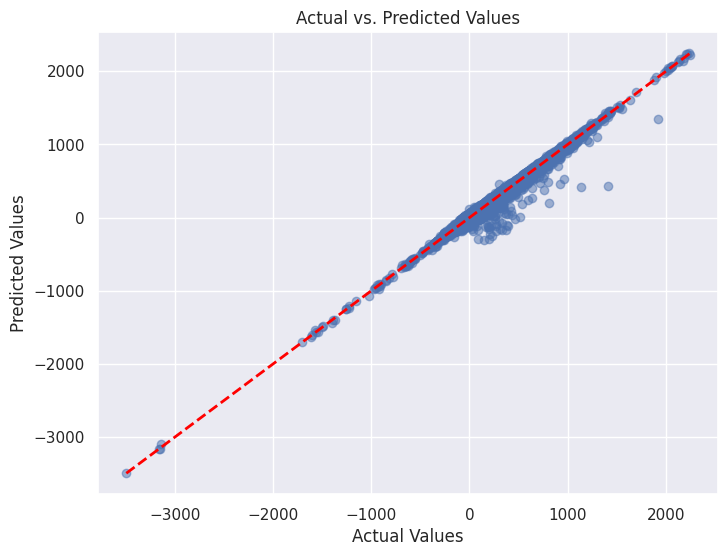

In [17]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

# **Building a model using only significant columns **

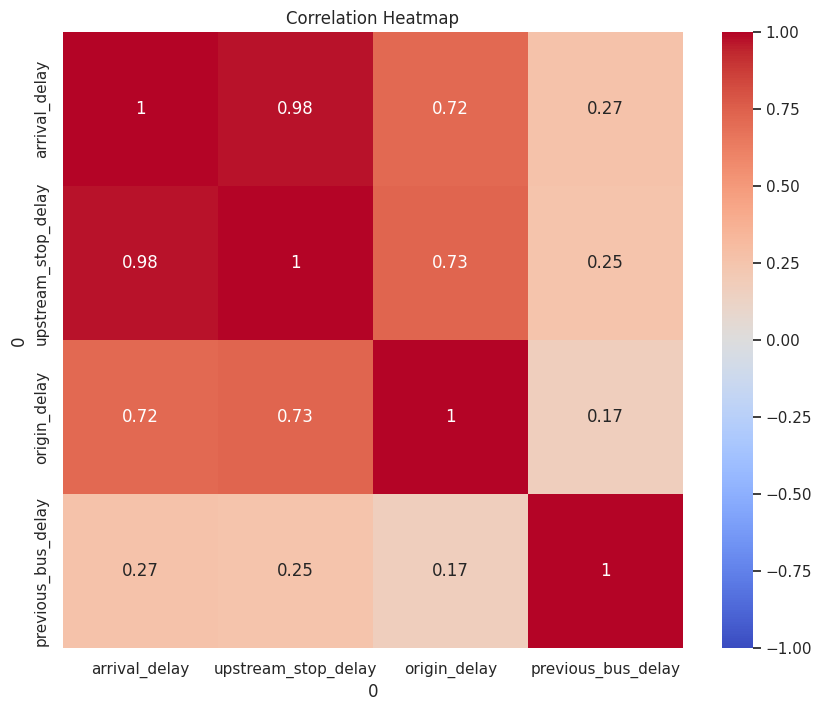

In [18]:
#Find out high related factors

corr_matrix = df.corr()
abs_corr_arrival_delay = corr_matrix['arrival_delay'].abs()
columns_to_drop = abs_corr_arrival_delay[abs_corr_arrival_delay < 0.2].index
high_corr = df.drop(columns=columns_to_drop)
high_corr.head()

corr_df = high_corr.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 12})
plt.title('Correlation Heatmap')
# plt.xticks(rotation=45)
plt.show()

MAE: 29.7863
MSE: 1680.1870
R-squared: 0.9156


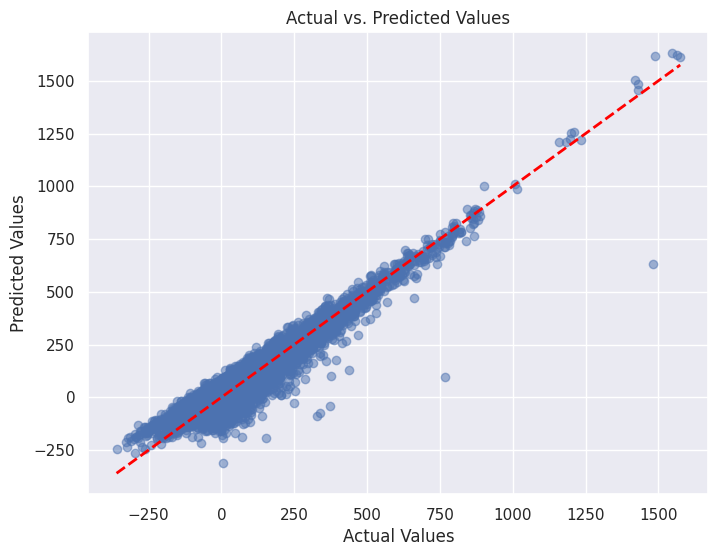

In [ ]:
#Modelling using high related factors

x = high_corr.drop(['arrival_delay'], axis=1)
y = high_corr['arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

In [ ]:
#Make selection for set combination 1

df_set1 = df[df["factor(weather)Normal"]==1]
# df_set1 = df[df["factor(time_of_day)Off-peak"]==1]
df_set1 = df[df["stop_sequence"].isin([1, 2, 5, 6, 9, 10, 13, 15, 17, 18, 25])]
df_set1 = df_set1.drop("stop_sequence", axis=1)
df_set1

,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,previous_bus_delay,previous_trip_travel_time,traffic_condition,recurrent_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
1,151.0,0.0,0.0,120.0,100.0,100.0,160.0,216.0,168.666667,161.25,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,185.0,24.0,171.0,45.0,151.0,100.0,198.0,47.0,46.333333,36.5,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,242.0,21.0,98.0,86.0,202.0,100.0,256.0,123.0,102.0,88.75,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,260.0,13.0,105.0,38.0,242.0,100.0,255.0,37.0,35.0,37.25,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
9,292.0,24.0,83.0,47.0,272.0,100.0,210.0,30.0,37.666667,33.5,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80986,121.0,80.0,45.0,95.0,55.0,16.0,40.0,82.0,87.0,86.980392,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
80988,110.0,34.0,88.0,87.0,99.0,16.0,50.0,65.0,54.333333,54.058824,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
80990,76.0,52.0,93.0,108.0,68.0,16.0,92.0,74.0,68.666667,69.529412,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
80991,131.0,29.0,64.0,101.0,76.0,16.0,149.0,145.0,123.666667,102.156863,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


MAE: 12.9893
MSE: 500.0707
R-squared: 0.9691


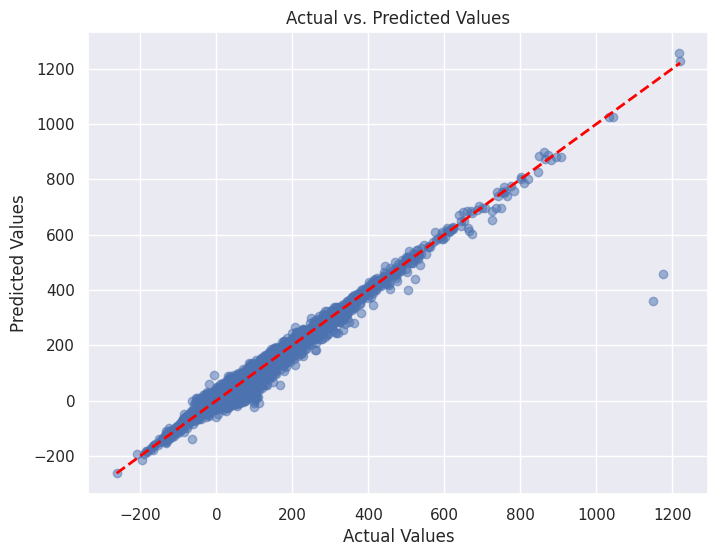

In [ ]:
x = df_set1.drop(['arrival_delay'], axis=1)
y = df_set1['arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()

In [ ]:
#Make selection for set combination 2

# df_set2 = df[(df["factor(weather)Normal"] == 1) | (df["factor(time_of_day)Off-peak"] == 0)]
# df_set2 = df[df["factor(time_of_day)Off-peak"]==0]
# df_set2 = df[df["stop_sequence"].isin([1, 2, 5, 6, 9, 10, 13, 15, 17, 18, 25])]
df_set2 = df[df["stop_sequence"].isin([3,4,7,8,11,12,14,16,19,20,21,22,23,24,26,27])]
df_set2 = df_set2.drop("stop_sequence", axis=1)
df_set2

,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,previous_bus_delay,previous_trip_travel_time,traffic_condition,recurrent_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
3,186.0,0.0,55.0,41.0,185.0,100.0,189.0,32.0,36.666667,34.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,202.0,12.0,42.0,94.0,186.0,100.0,200.0,89.0,88.0,87.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,278.0,12.0,43.0,79.0,260.0,100.0,238.0,62.0,73.0,69.25,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,272.0,8.0,85.0,97.0,278.0,100.0,213.0,72.0,83.333333,72.5,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
11,346.0,13.0,135.0,91.0,351.0,100.0,204.0,55.0,64.0,58.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80995,97.0,19.0,84.0,81.0,100.0,16.0,62.0,48.0,52.666667,56.25,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
80996,107.0,24.0,59.0,60.0,97.0,16.0,60.0,40.0,40.666667,41.479167,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
80997,98.0,18.0,46.0,126.0,107.0,16.0,56.0,101.0,85.0,82.416667,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
80999,171.0,19.0,58.0,81.0,115.0,16.0,91.0,59.0,62.0,78.520833,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


MAE: 11.3931
MSE: 283.9766
R-squared: 0.9879


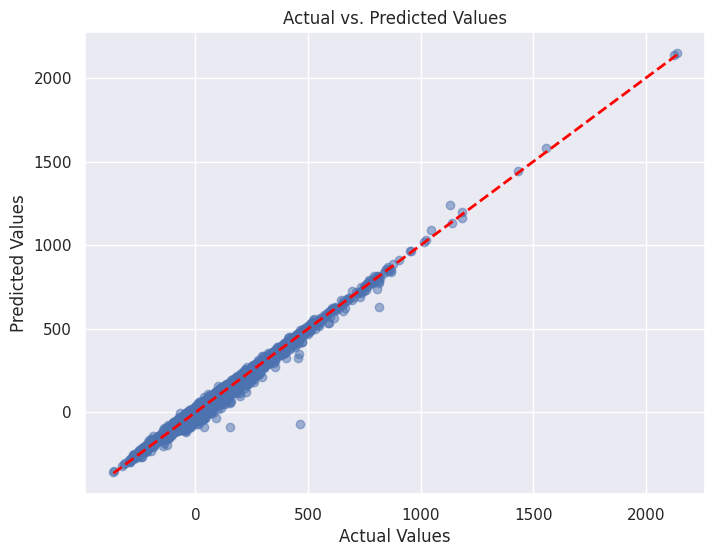

In [ ]:
x = df_set2.drop(['arrival_delay'], axis=1)
y = df_set2['arrival_delay']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)
plt.show()